In [3]:
import sqil_core as sqil
import numpy as np
import matplotlib.pyplot as plt

from laboneq.dsl.quantum import QPU
from laboneq_applications.qpu_types.tunable_transmon import (
    TunableTransmonOperations,
    TunableTransmonQubit,
)
from helpers.sqil_transmon.qubit import SqilTransmon
from helpers.sqil_transmon.operations import SqilTransmonOperations

from laboneq_applications.experiments.options import (
    ResonatorSpectroscopyExperimentOptions,
)
from laboneq_applications.core import validation
from laboneq.dsl.enums import AcquisitionType
from laboneq.simple import Experiment, SweepParameter, dsl

from laboneq.dsl.quantum.quantum_element import QuantumElement
from numpy.typing import ArrayLike

%matplotlib inline

In [4]:
params = {
    "readout_lo_frequency": 7.2e9,
    "drive_lo_frequency": 5e9,
    "ext_lo": 11e9
}

### Resonator spectroscopy

2025-07-15 11:57:46,362 - INFO - Successfully connected to zi


[2025.07.15 11:57:46.367] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\sqil_experiments\measurements\laboneq_output\log
[2025.07.15 11:57:46.370] INFO    VERSION: laboneq 2.54.0
[2025.07.15 11:57:46.371] INFO    Connecting to data server at localhost:8004
[2025.07.15 11:57:46.374] INFO    Connected to Zurich Instruments LabOne Data Server version 25.04.1.17 at localhost:8004
[2025.07.15 11:57:46.385] INFO    Configuring the device setup
[2025.07.15 11:57:46.393] INFO    The device setup is configured


2025-07-15 11:57:46,397 - INFO - Setting up instruments
2025-07-15 11:57:46,398 - INFO - Before exp


[2025.07.15 11:57:46.411] INFO    Resolved modulation type of oscillator 'q0_drive_ge_osc' on signal 'q0/drive' to HARDWARE
[2025.07.15 11:57:46.413] INFO    Starting LabOne Q Compiler run...
[2025.07.15 11:57:46.442] INFO    Schedule completed. [0.026 s]
[2025.07.15 11:57:46.475] INFO    Code generation completed for all AWGs. [0.031 s]
[2025.07.15 11:57:46.476] INFO    Completed compilation step 1 of 1. [0.060 s]
[2025.07.15 11:57:46.479] INFO     ──────────────────────────────────────────────────────────────── 
[2025.07.15 11:57:46.479] INFO      Device       AWG   SeqC LOC   CT entries   Waveforms   Samples  
[2025.07.15 11:57:46.480] INFO     ──────────────────────────────────────────────────────────────── 
[2025.07.15 11:57:46.481] INFO      shfqc_0        0         21            0           1      8000  
[2025.07.15 11:57:46.482] INFO      shfqc_0_sg     0          9            1           0         0  
[2025.07.15 11:57:46.482] INFO     ─────────────────────────────────────────

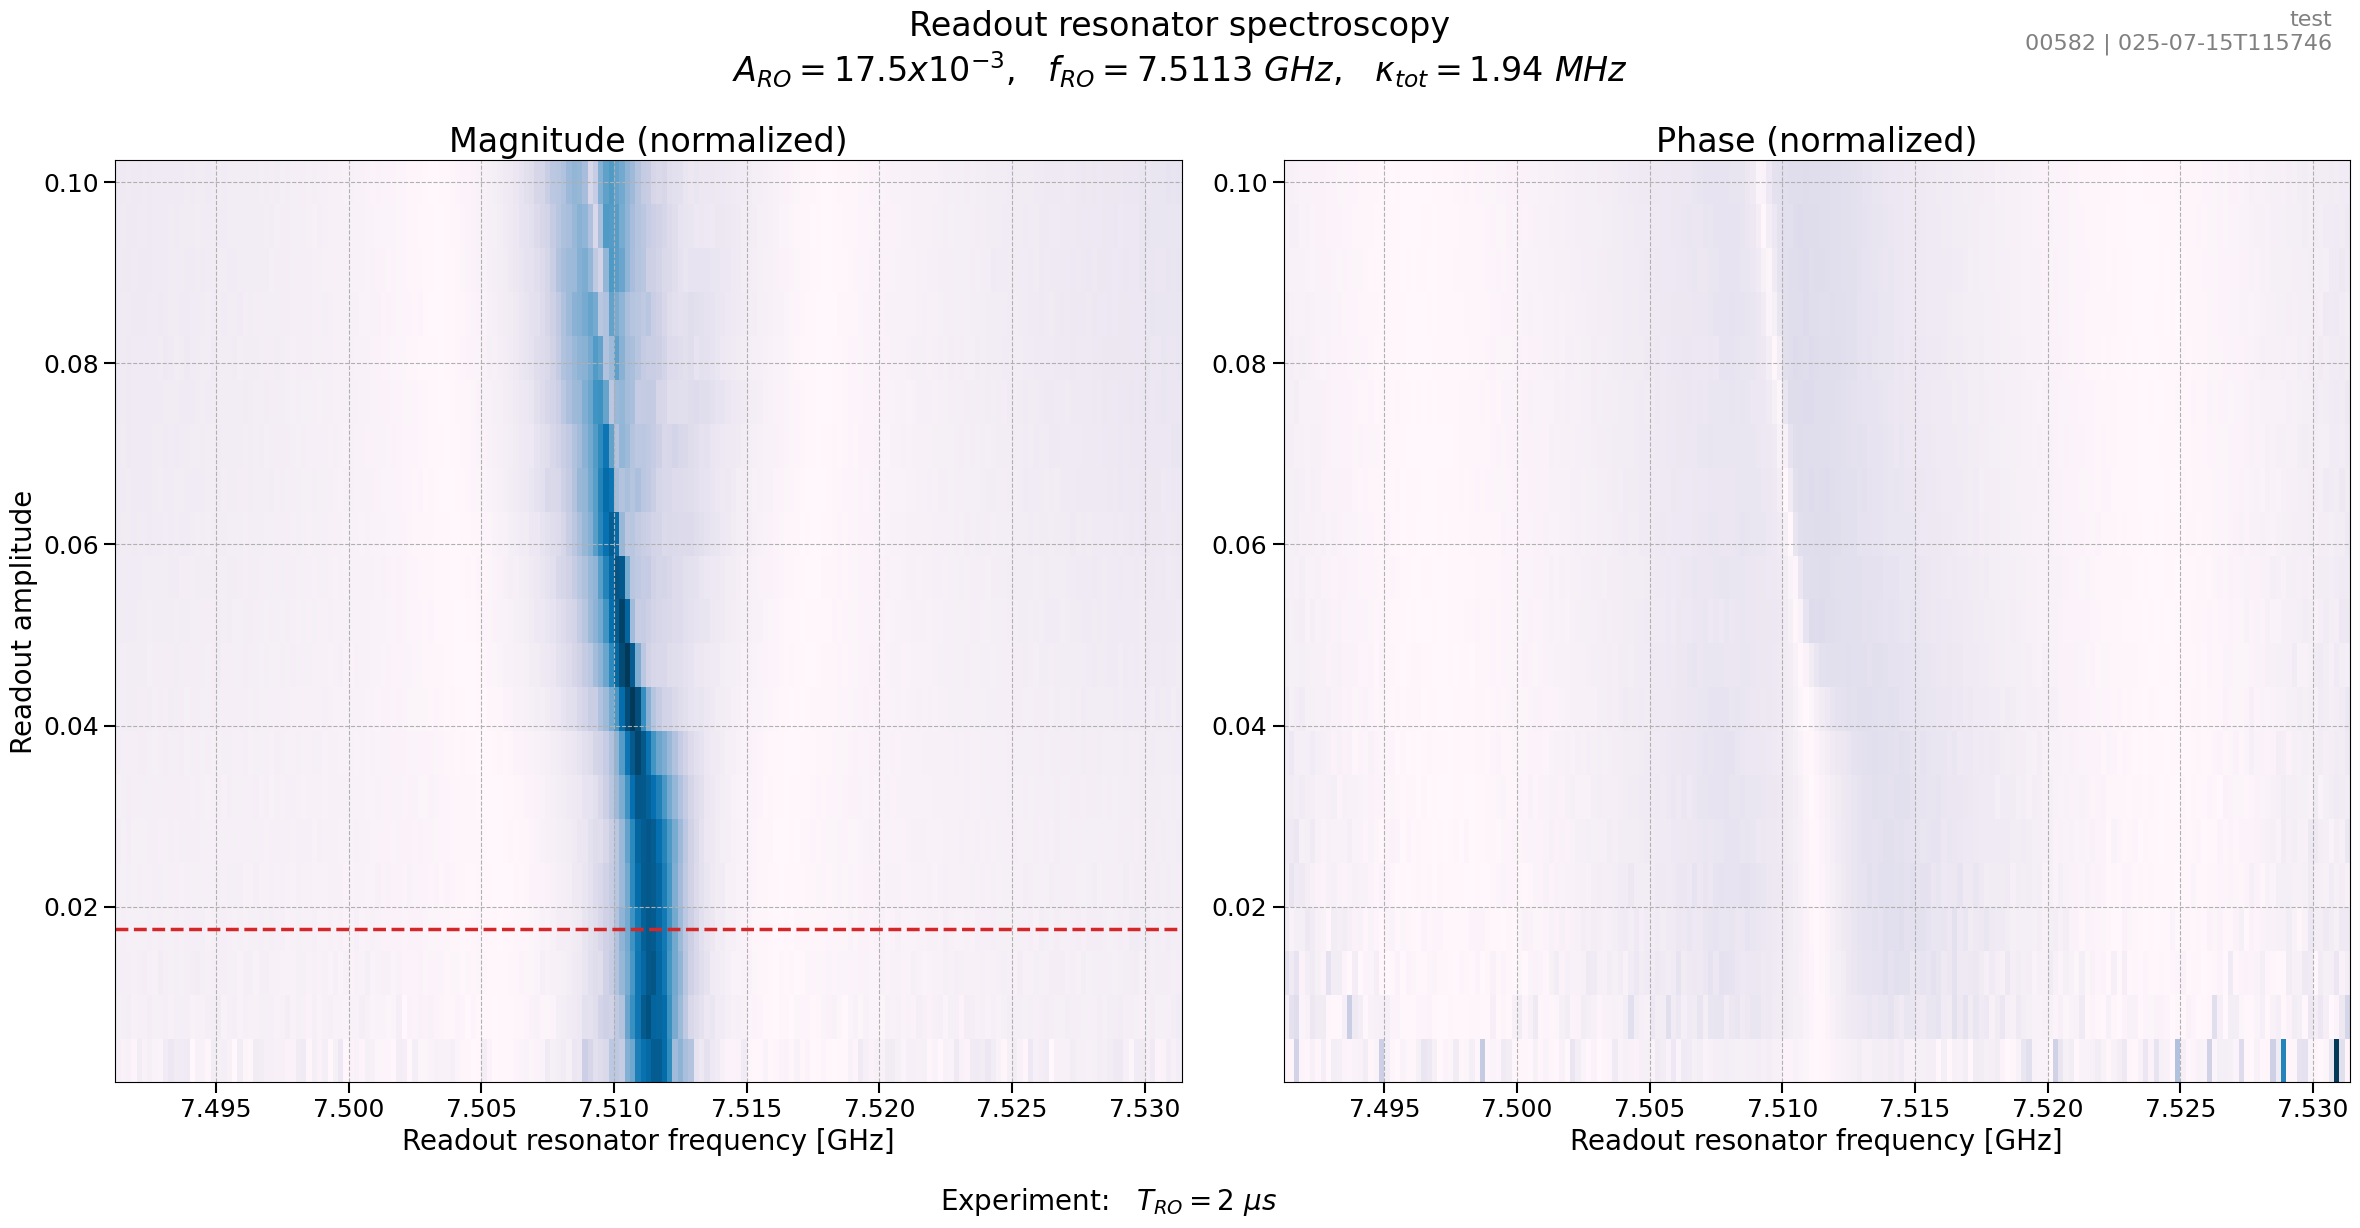

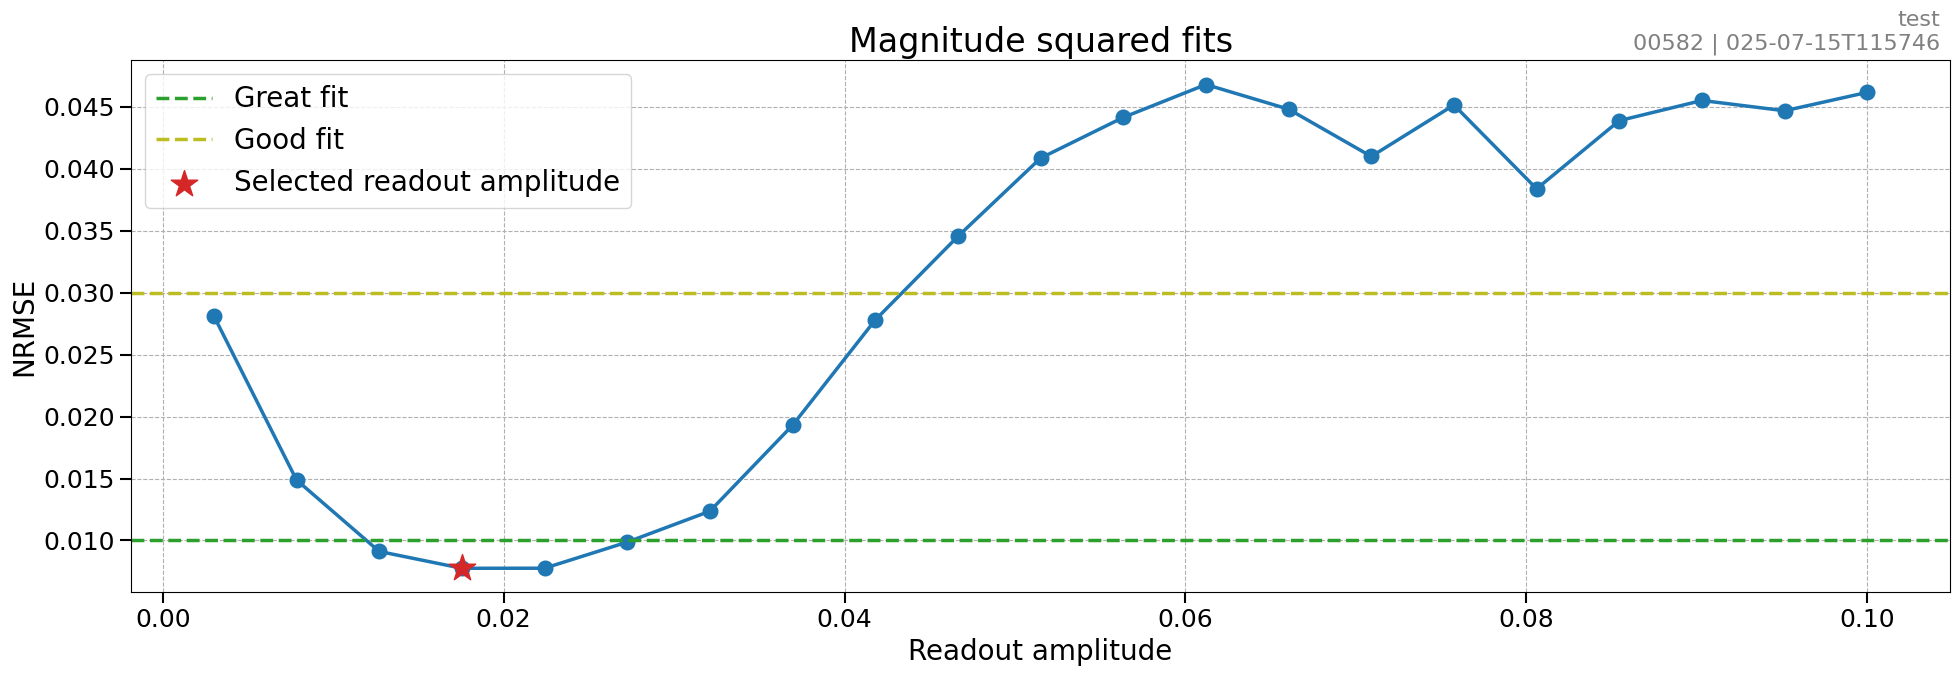

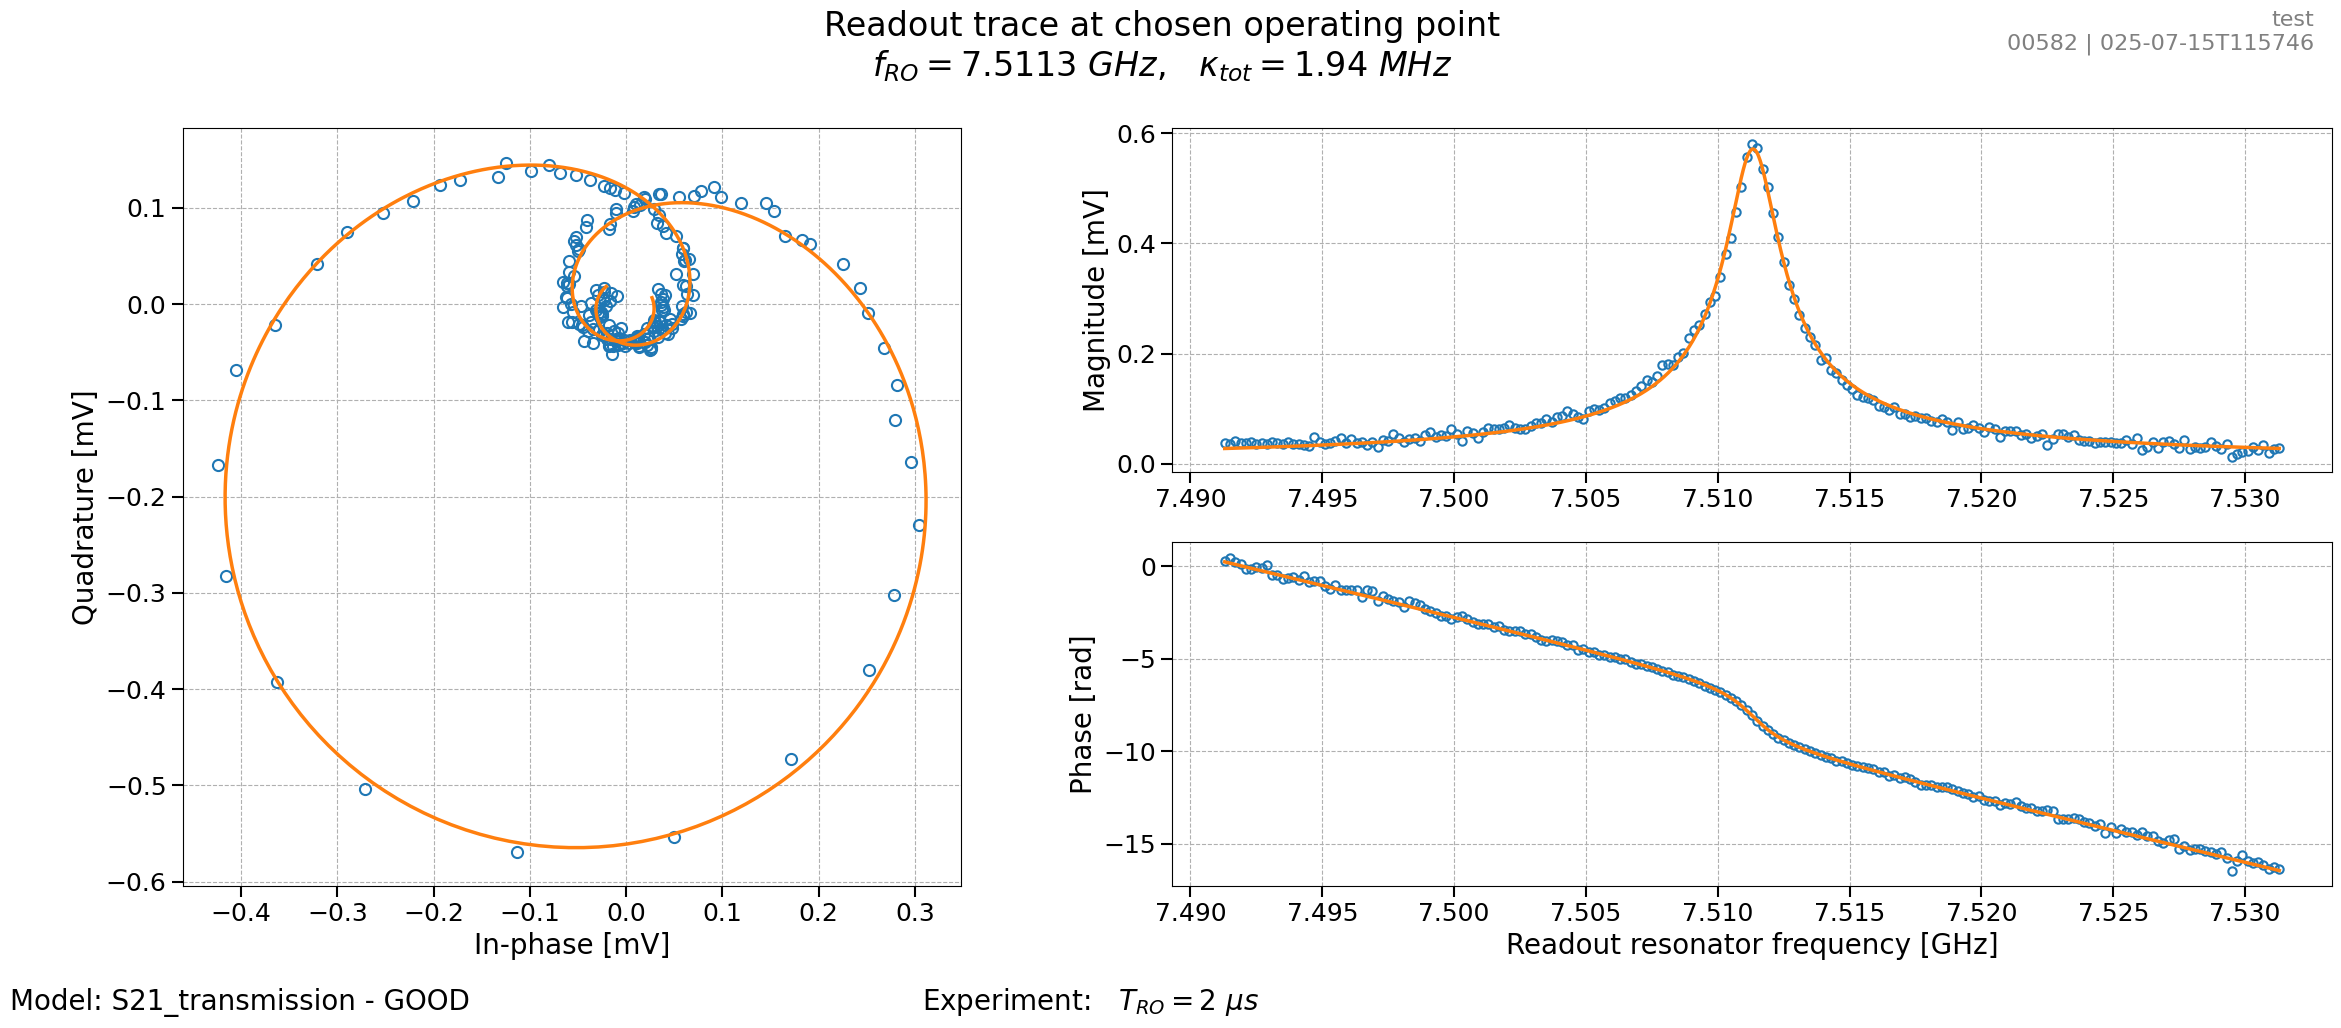

In [3]:
import numpy as np
from rr_spec import RRSpec, ResonatorSpectroscopyExperimentOptions

rr_spec = RRSpec()
options = ResonatorSpectroscopyExperimentOptions()
options.count = 400

result = rr_spec.run(
    # np.linspace(7e9, 8e9, 2001),
    rr_spec.sweep_around("readout_resonator_frequency", 20e6, n_points=201),
    sweeps={"readout_amplitude": np.linspace(0.003, 0.1, 21)},
    options=options,
)

### Qubit specroscopy

2025-07-15 11:12:55,160 - INFO - Successfully connected to zi


[2025.07.15 11:12:55.166] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\sqil_experiments\measurements\laboneq_output\log
[2025.07.15 11:12:55.167] INFO    VERSION: laboneq 2.54.0
[2025.07.15 11:12:55.168] INFO    Connecting to data server at localhost:8004
[2025.07.15 11:12:55.172] INFO    Connected to Zurich Instruments LabOne Data Server version 25.04.1.17 at localhost:8004
[2025.07.15 11:12:55.182] INFO    Configuring the device setup
[2025.07.15 11:12:55.189] INFO    The device setup is configured


2025-07-15 11:12:55,200 - INFO - Setting up instruments
2025-07-15 11:12:55,201 - INFO - Before exp


[2025.07.15 11:12:55.210] INFO    Resolved modulation type of oscillator 'q0_readout_acquire_osc' on signal 'q0/acquire' to HARDWARE
[2025.07.15 11:12:55.211] INFO    Resolved modulation type of oscillator 'q0_drive_ge_osc' on signal 'q0/drive' to HARDWARE
[2025.07.15 11:12:55.212] INFO    Starting LabOne Q Compiler run...
[2025.07.15 11:12:55.374] INFO    Schedule completed. [0.161 s]
[2025.07.15 11:12:55.414] INFO    Code generation completed for all AWGs. [0.039 s]
[2025.07.15 11:12:55.415] INFO    Completed compilation step 1 of 1. [0.202 s]
[2025.07.15 11:12:55.418] INFO     ──────────────────────────────────────────────────────────────── 
[2025.07.15 11:12:55.419] INFO      Device       AWG   SeqC LOC   CT entries   Waveforms   Samples  
[2025.07.15 11:12:55.420] INFO     ──────────────────────────────────────────────────────────────── 
[2025.07.15 11:12:55.420] INFO      shfqc_0        0         11            0           1      8000  
[2025.07.15 11:12:55.421] INFO      shfqc_0_

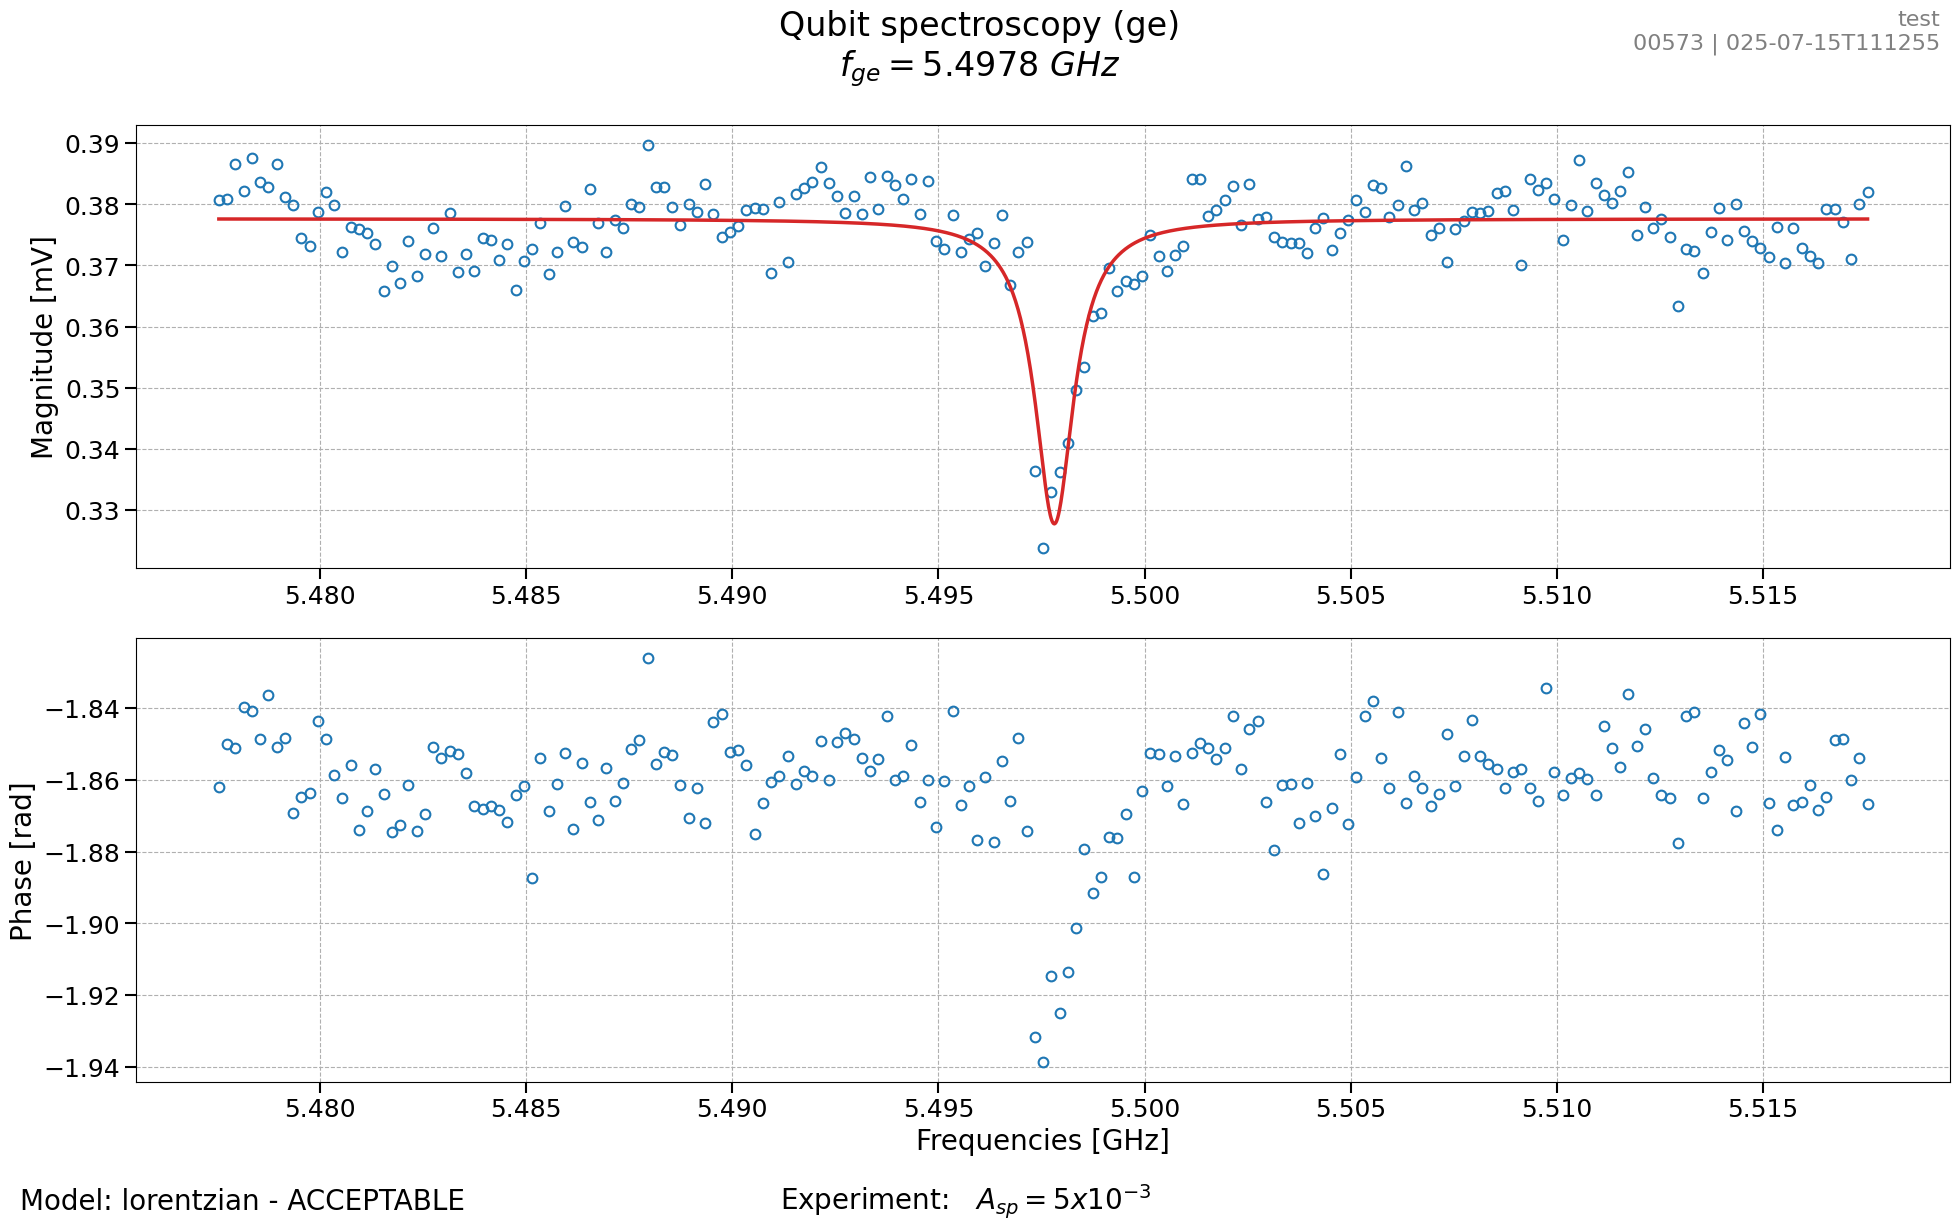

In [ ]:
import numpy as np
from qu_spec import QuSpec, QuSpecOptions
from laboneq.dsl.enums import AveragingMode

qu_spec = QuSpec()
options = QuSpecOptions()
options.count = 1000
options.averaging_mode = AveragingMode.CYCLIC

result = qu_spec.run(
    # np.linspace(4.5e9, 5.5e9, 2001),
    qu_spec.sweep_around("resonance_frequency_ge", 20e6, n_points=201),
    # sweeps={"spectroscopy_amplitude": np.linspace(0.8,1,5)},
    options=options,
)

### Time Rabi

2025-07-15 11:30:11,760 - INFO - Successfully connected to zi


[2025.07.15 11:30:11.765] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\sqil_experiments\measurements\laboneq_output\log
[2025.07.15 11:30:11.766] INFO    VERSION: laboneq 2.54.0
[2025.07.15 11:30:11.767] INFO    Connecting to data server at localhost:8004
[2025.07.15 11:30:11.770] INFO    Connected to Zurich Instruments LabOne Data Server version 25.04.1.17 at localhost:8004
[2025.07.15 11:30:11.789] INFO    Configuring the device setup
[2025.07.15 11:30:11.801] INFO    The device setup is configured


2025-07-15 11:30:11,820 - INFO - Setting up instruments
2025-07-15 11:30:11,822 - INFO - Before exp


[2025.07.15 11:30:11.840] INFO    Resolved modulation type of oscillator 'q0_readout_acquire_osc' on signal 'q0/acquire' to HARDWARE
[2025.07.15 11:30:11.842] INFO    Resolved modulation type of oscillator 'q0_drive_ge_osc' on signal 'q0/drive' to HARDWARE
[2025.07.15 11:30:11.843] INFO    Starting LabOne Q Compiler run...
[2025.07.15 11:30:11.856] INFO    Schedule completed. [0.010 s]
[2025.07.15 11:30:11.871] INFO    Requested to compress pulse(s) rx_pulse_0 which has(have) either no, or too short, constant sections. Skipping compression
[2025.07.15 11:30:11.874] INFO    Requested to compress pulse(s) rx_pulse_0 which has(have) either no, or too short, constant sections. Skipping compression
[2025.07.15 11:30:11.878] INFO    Requested to compress pulse(s) rx_pulse_0 which has(have) either no, or too short, constant sections. Skipping compression
[2025.07.15 11:30:11.881] INFO    Requested to compress pulse(s) rx_pulse_0 which has(have) either no, or too short, constant sections. Skip

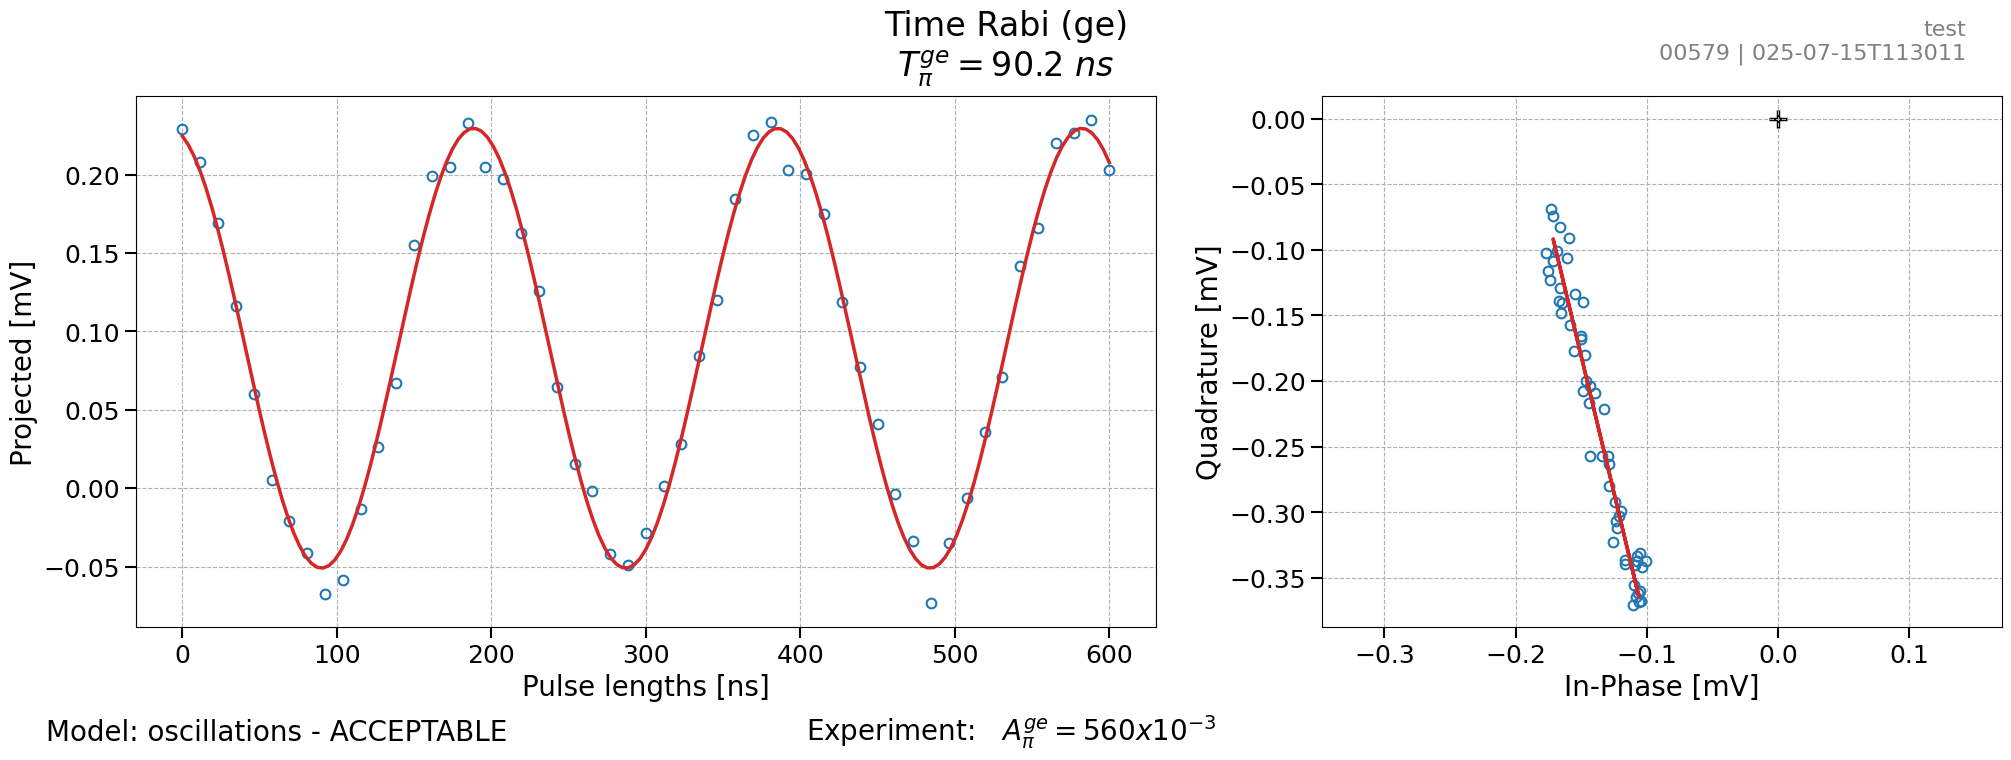

In [ ]:
import numpy as np
from time_rabi import TimeRabi, TimeRabiOptions
from laboneq.dsl.enums import AcquisitionType, AveragingMode

time_rabi = TimeRabi()
options = TimeRabiOptions()
options.count = 2**8
options.acquisition_type = AcquisitionType.SPECTROSCOPY

result = time_rabi.run(
    np.linspace(1e-10, 600e-9, 53),
    # sweeps={"readout_range_out": [-30, -20], "readout_amplitude": [0.5, 1]},
    # sweeps={"resonance_frequency_ge": np.linspace(qu_freq-5e6, qu_freq+5e6, 11)},
    options=options,
)

### T1

2025-07-15 13:22:58,280 - INFO - Successfully connected to zi


[2025.07.15 13:22:58.287] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\sqil_experiments\measurements\laboneq_output\log
[2025.07.15 13:22:58.289] INFO    VERSION: laboneq 2.54.0
[2025.07.15 13:22:58.290] INFO    Connecting to data server at localhost:8004
[2025.07.15 13:22:58.293] INFO    Connected to Zurich Instruments LabOne Data Server version 25.04.1.17 at localhost:8004
[2025.07.15 13:22:58.304] INFO    Configuring the device setup
[2025.07.15 13:22:58.312] INFO    The device setup is configured


2025-07-15 13:22:58,314 - INFO - Setting up instruments
2025-07-15 13:22:58,316 - INFO - Before exp


[2025.07.15 13:22:58.327] INFO    Resolved modulation type of oscillator 'q0_readout_acquire_osc' on signal 'q0/acquire' to HARDWARE
[2025.07.15 13:22:58.328] INFO    Resolved modulation type of oscillator 'q0_drive_ge_osc' on signal 'q0/drive' to HARDWARE
[2025.07.15 13:22:58.330] INFO    Starting LabOne Q Compiler run...
[2025.07.15 13:22:58.337] INFO    Schedule completed. [0.005 s]
[2025.07.15 13:22:58.348] INFO    Code generation completed for all AWGs. [0.009 s]
[2025.07.15 13:22:58.349] INFO    Completed compilation step 1 of 1. [0.017 s]
[2025.07.15 13:22:58.351] INFO     ──────────────────────────────────────────────────────────────── 
[2025.07.15 13:22:58.352] INFO      Device       AWG   SeqC LOC   CT entries   Waveforms   Samples  
[2025.07.15 13:22:58.353] INFO     ──────────────────────────────────────────────────────────────── 
[2025.07.15 13:22:58.353] INFO      shfqc_0        0        104            0           1      8000  
[2025.07.15 13:22:58.354] INFO      shfqc_0_

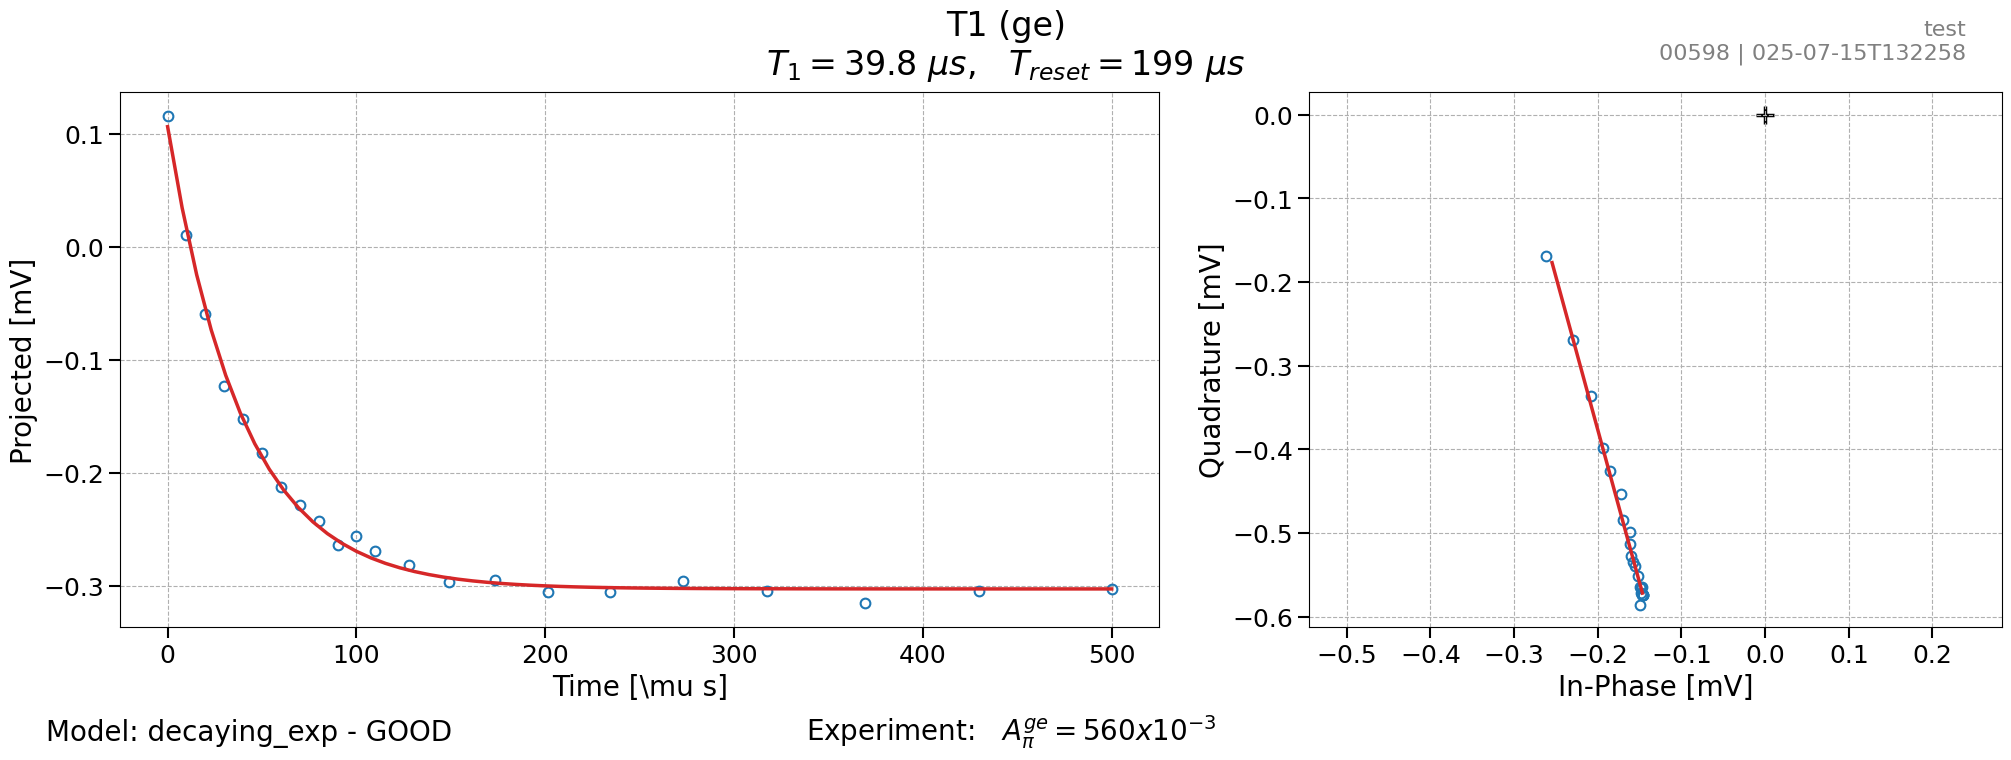

In [5]:
from sqil_experiments.measurements.T1 import T1
import numpy as np
from laboneq_applications.experiments.options import (
    TuneupExperimentOptions,
)
from laboneq.dsl.enums import AcquisitionType

T1_value = 100e-6

time = np.hstack(
    [
        np.linspace(0, T1_value, 11),
        np.logspace(np.log(T1_value * 1.1), np.log(5 * T1_value), 11, base=np.e),
    ]
)

options =TuneupExperimentOptions()
options.acquisition_type = AcquisitionType.SPECTROSCOPY
options.count = 2**11


T1_exp = T1()
result = T1_exp.run(
    time,
    options=options,
)

### T2 echo

In [ ]:
from sqil_experiments.measurements.T2Echo import T2Echo
import numpy as np
from laboneq_applications.experiments.options import (
    TuneupExperimentOptions,
)
from laboneq.dsl.enums import AcquisitionType

T2_value = 100e-6

time = np.hstack(
    [
        np.linspace(0, T2_value, 11),
        np.logspace(np.log(T2_value * 1.1), np.log(5 * T2_value), 11, base=np.e),
    ]
)

options = TuneupExperimentOptions()
options.acquisition_type = AcquisitionType.SPECTROSCOPY
options.count = 2**11


T2_exp = T2Echo()
result = T2_exp.run(
    time,
    options=options,
)

### Tests

In [5]:
import numpy as np
10 + 20 * np.log10(0.1)

np.float64(-10.0)

2025-07-13 10:01:37,883 - INFO - Successfully connected to zi


[2025.07.13 10:01:37.888] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\sqil_experiments\measurements\laboneq_output\log
[2025.07.13 10:01:37.890] INFO    VERSION: laboneq 2.54.0
[2025.07.13 10:01:37.890] INFO    Connecting to data server at localhost:8004
[2025.07.13 10:01:37.895] INFO    Connected to Zurich Instruments LabOne Data Server version 25.04.1.17 at localhost:8004
[2025.07.13 10:01:37.906] INFO    Configuring the device setup
[2025.07.13 10:01:37.913] INFO    The device setup is configured


2025-07-13 10:01:37,915 - INFO - Setting up instruments
2025-07-13 10:01:37,917 - INFO - Before exp


[2025.07.13 10:01:37.931] INFO    Starting LabOne Q Compiler run...
[2025.07.13 10:01:37.983] INFO    Schedule completed. [0.050 s]
[2025.07.13 10:01:38.035] INFO    Code generation completed for all AWGs. [0.059 s]
[2025.07.13 10:01:38.035] INFO    Completed compilation step 1 of 1. [0.112 s]
[2025.07.13 10:01:38.035] INFO     ──────────────────────────────────────────────────────────────── 
[2025.07.13 10:01:38.035] INFO      Device       AWG   SeqC LOC   CT entries   Waveforms   Samples  
[2025.07.13 10:01:38.035] INFO     ──────────────────────────────────────────────────────────────── 
[2025.07.13 10:01:38.050] INFO      shfqc_0        0         21            0           1      8000  
[2025.07.13 10:01:38.050] INFO      shfqc_0_sg     0          9            1           0         0  
[2025.07.13 10:01:38.052] INFO     ──────────────────────────────────────────────────────────────── 
[2025.07.13 10:01:38.053] INFO      TOTAL                    30            1                  8000 

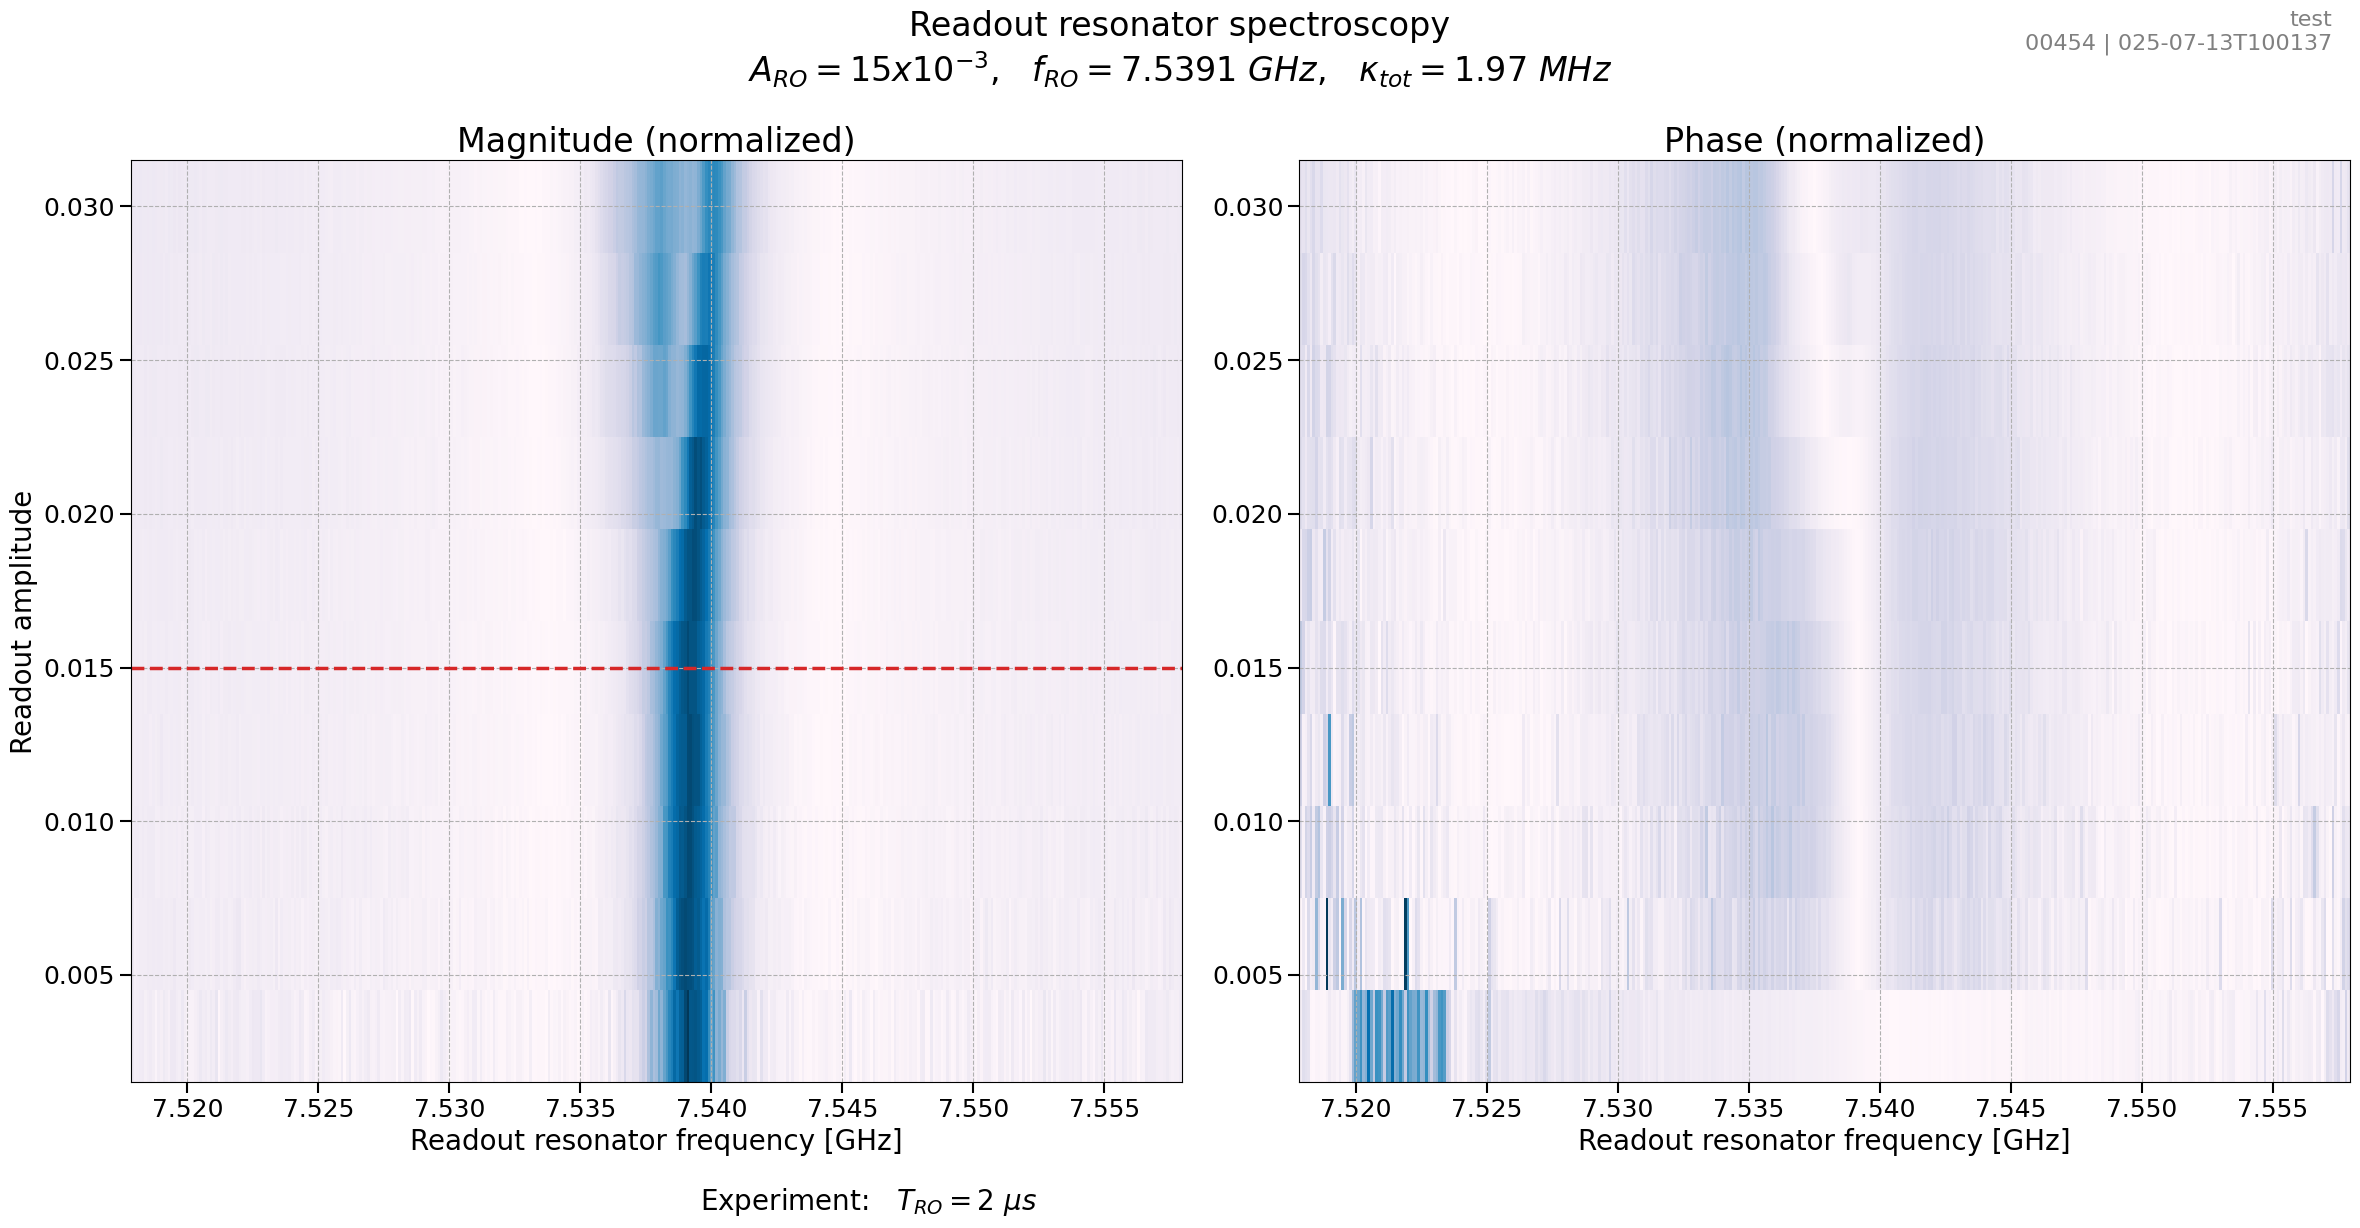

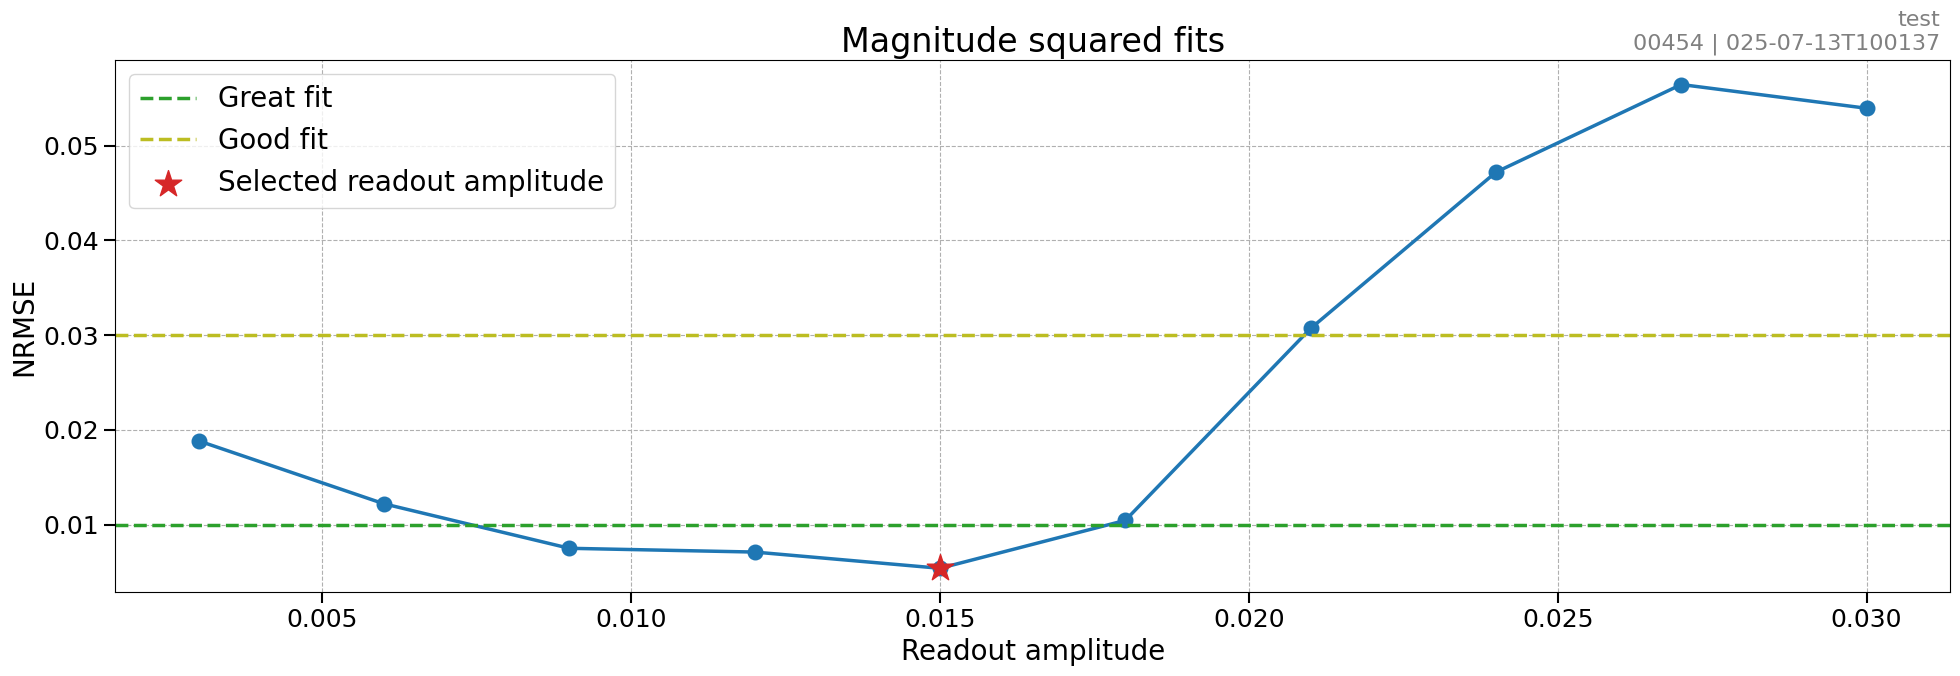

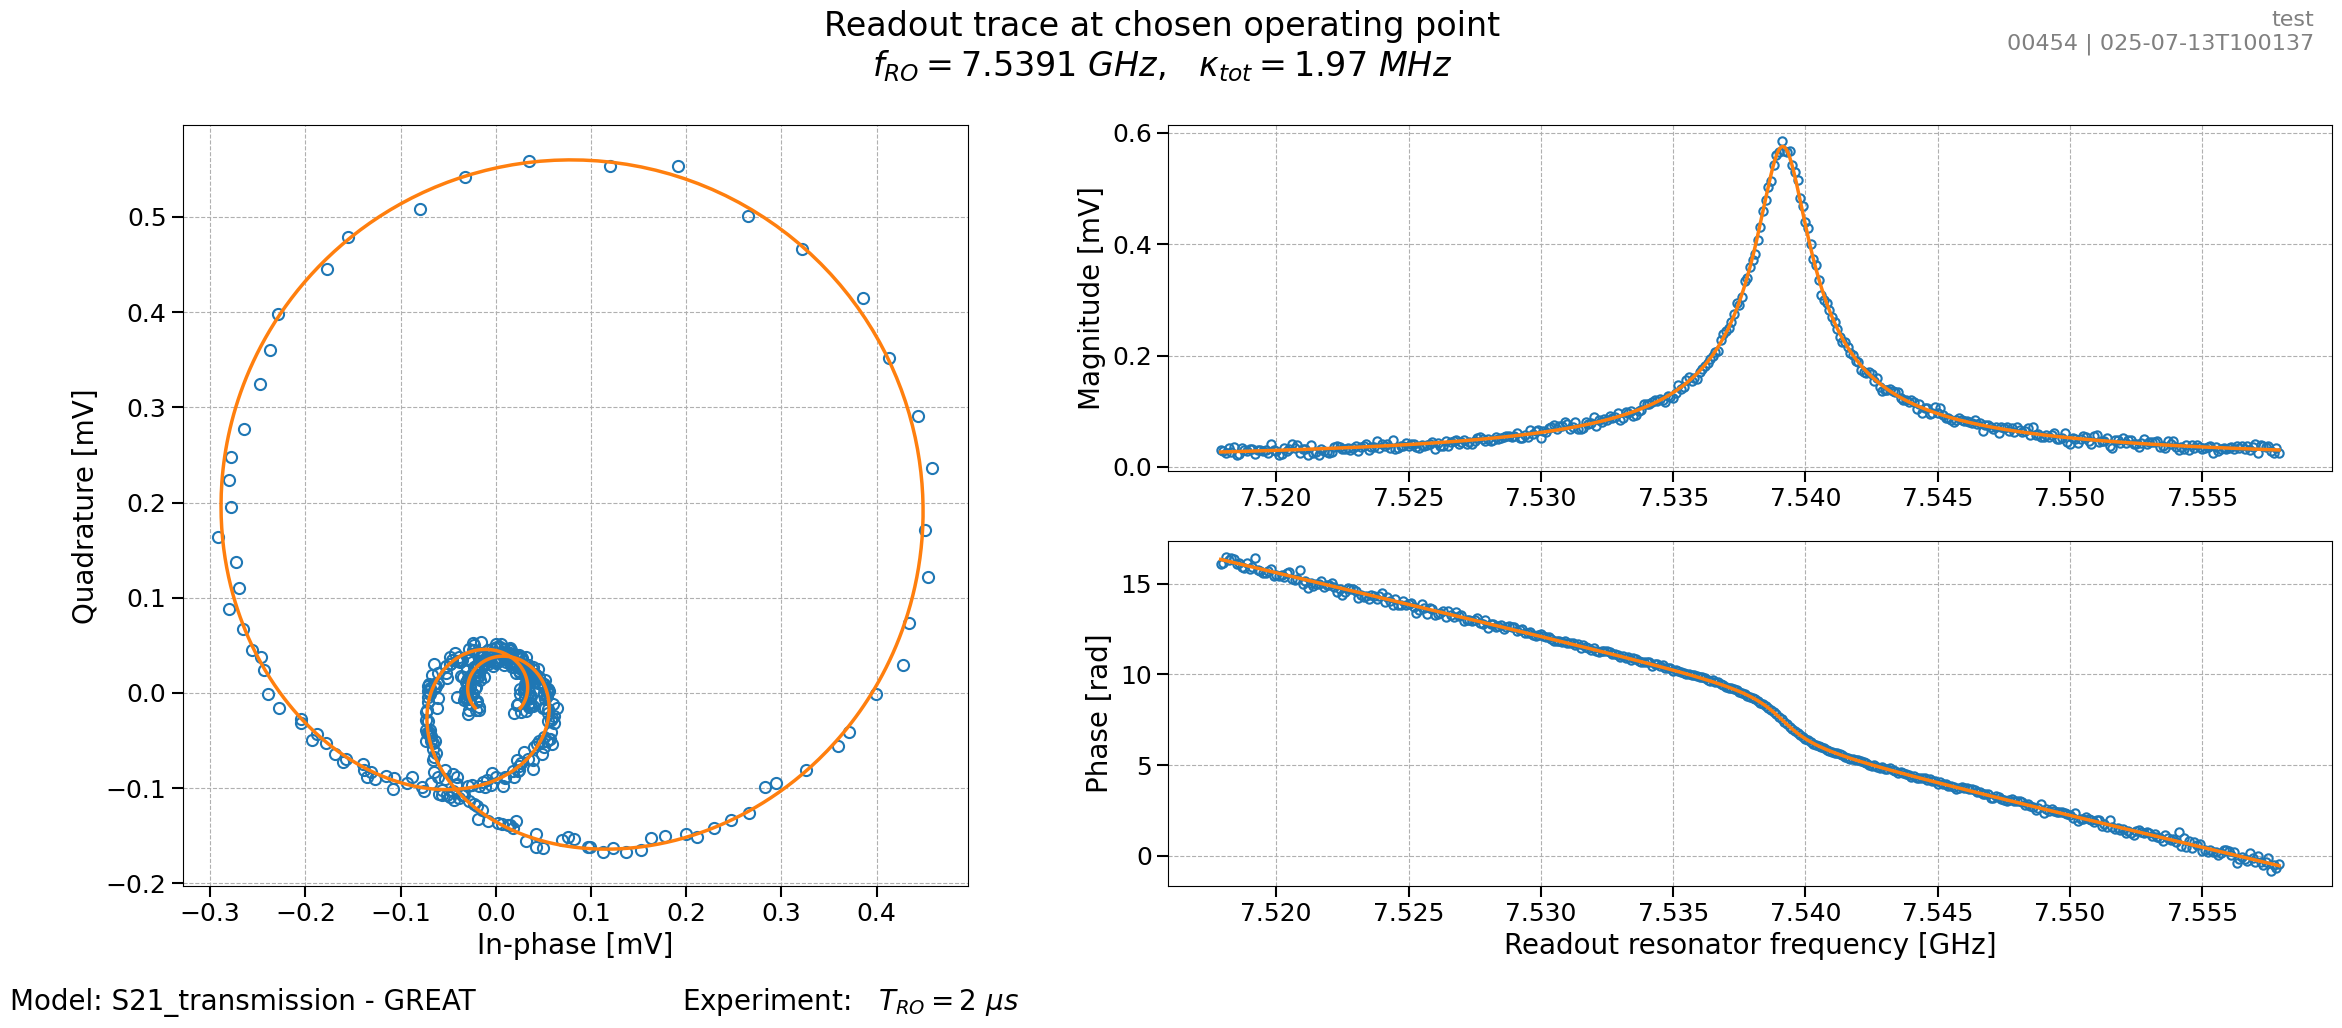

In [2]:
import numpy as np
from rr_spec import RRSpec, ResonatorSpectroscopyExperimentOptions

ro_freq = 7.5379e9

rr_spec = RRSpec()
options = ResonatorSpectroscopyExperimentOptions()
options.count = 400

result = rr_spec.run(
    np.linspace(ro_freq + 20e6, ro_freq - 20e6, 401),
    sweeps={"readout_amplitude": np.linspace(0.003, 0.03, 10)},
    options=options,
)

average relative std: 0.45369850227250913
average std: 9.460869266857227e-05
std of the std: 1.3977359178516824e-05
relative std over std avg: 0.14773863568204568


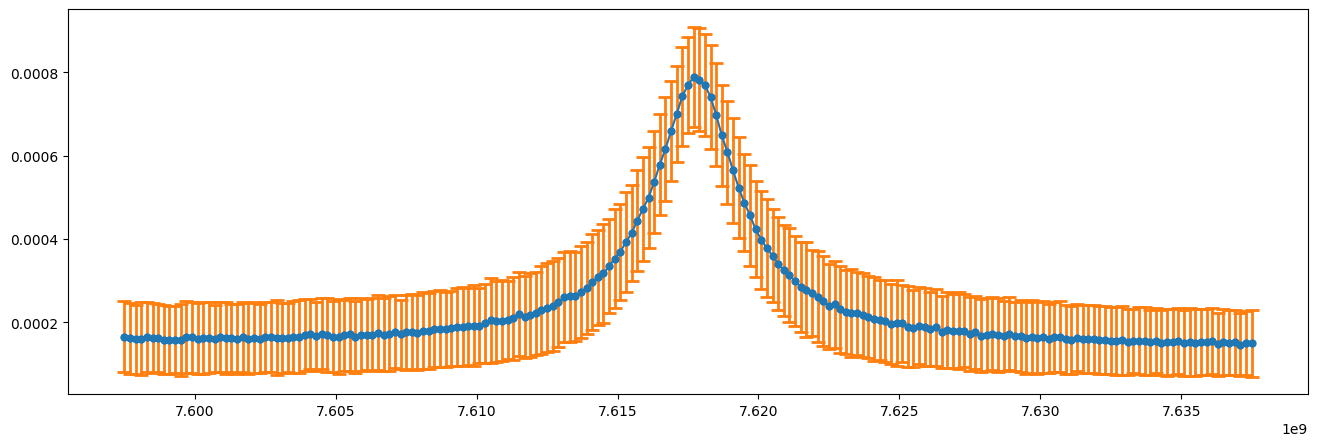

In [ ]:
import sqil_core as sqil
import matplotlib.pyplot as plt

# count = 2600
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data_local\2025-05-14\00163-rr_spectroscopy_2025-05-14T012721"
# count = 1048
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data_local\2025-05-14\00158-rr_spectroscopy_2025-05-14T012004"
# count = 200
# path = r"C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data_local\2025-05-14\00165-rr_spectroscopy_2025-05-14T014453"
# count = 100
# path = r"C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data_local\2025-05-14\00164-rr_spectroscopy_2025-05-14T012812"
# count = 2
# path = r"C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data_local\2025-05-14\00159-rr_spectroscopy_2025-05-14T012109"

data, freq, sweep = sqil.extract_h5_data(
    path, ["data", "frequencies", "sweep0"]
)
linmag = np.abs(data[0])
print(
    "average relative std:", np.mean(np.std(linmag, axis=0) / np.mean(linmag, axis=0))
)
print("average std:", np.mean(np.std(linmag, axis=0)))
print("std of the std:", np.std(np.std(linmag, axis=0)))
print(
    "relative std over std avg:",
    np.mean(np.std(np.std(linmag, axis=0)) / np.mean(np.std(linmag, axis=0))),
)

plt.figure(figsize=(16, 5))
plt.errorbar(
    freq[0],
    np.mean(linmag, axis=0),
    np.std(linmag, axis=0),
    fmt="-o",
    color="tab:blue",
    label="Mean with Error",
    ecolor="tab:orange",
    capsize=5,
    capthick=2,
    elinewidth=2,
    markersize=5,
)
plt.show()

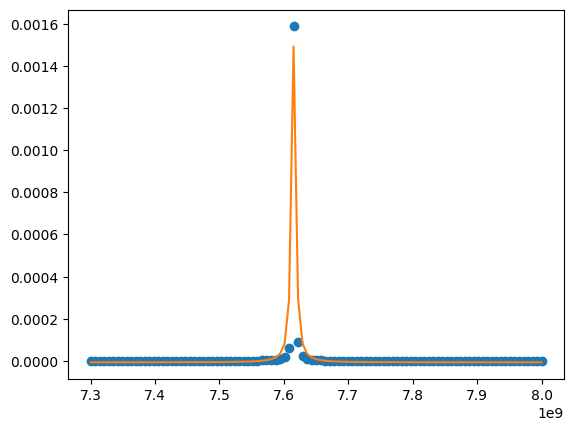

In [ ]:
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\2025-05-12\00011-rr spectroscopy_2025-05-12T231453"

data, freq = sqil.extract_h5_data(path, ["data", "frequencies"])

fit_res = sqil.fit.fit_lorentzian(freq, np.abs(data)**2)

plt.plot(freq, np.abs(data)**2, 'o')
plt.plot(freq, fit_res.predict(freq))
plt.show()

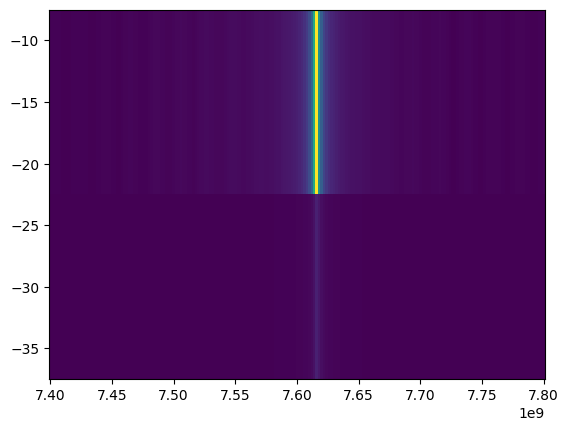

In [ ]:
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\2025-05-13\00029-rr spectroscopy_2025-05-13T005313"

data, freq, sweep = sqil.extract_h5_data(path, ["data", "frequencies", "sweep0"])

# for d, f, s in zip(data, freq, sweep):
#     plt.plot(f, np.abs(d), label=s)
# plt.legend()

plt.pcolormesh(freq[0], sweep, np.abs(data))

(201,) (2,) (2, 201)


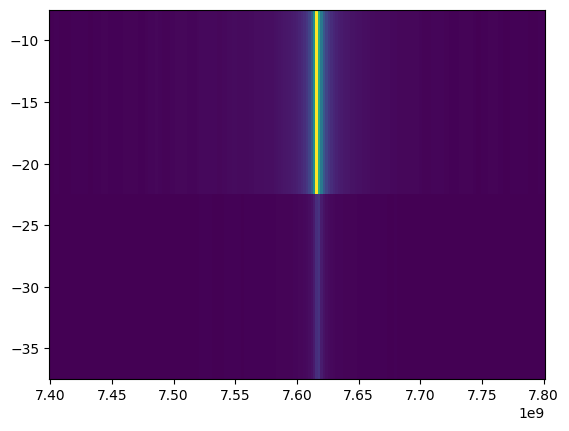

In [ ]:
path = r"Z:\Projects\BottomLoader\data\20250430_Transmon_20250207_multi_Fl_NbAl_N45\2025-05-13\00429-pulsed_onetone_vs_ro_power_2025-05-13T003736"

data, freq, sweep = sqil.extract_h5_data(path, ["data", "ro_freq", "sweep_param"])
plt.pcolormesh(freq[0], sweep, np.abs(data))

print(freq[0].shape, sweep.shape, data.shape)

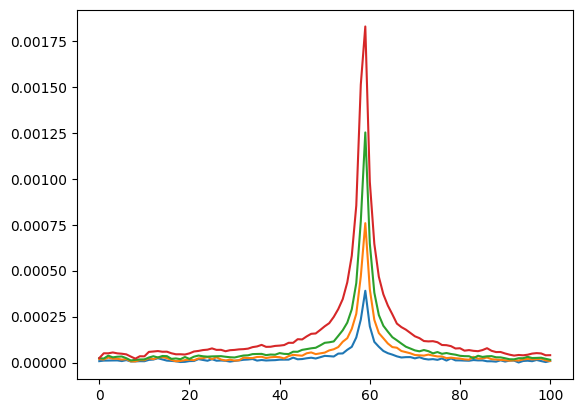

In [ ]:
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\2025-05-13\00126-rr spectroscopy_2025-05-13T222549"

data, freq, sweep0, sweep1 = sqil.extract_h5_data(path, ["data", "frequencies", "sweep0", "sweep1"])

data.shape, freq.shape, sweep0.shape, sweep1.shape

plt.plot(np.abs(data).T)